<h2>Exploratory data analysis</h2>

As part of our Sales analytcis project , we have to analyse the data provided by the Sales team.
We will perform below data quaility checks on the datasets.
<ul>
<li> Check the data for it's completeness, any duplicates, null or any na values</li>
<li>while imoorting the data to python,whether all the columns and any datatype mismatch errors</li>
<li>any outliers in the data, correlation between the measures</li>
</ul>



In [181]:
## importing all the packages in the environment

import pandas as pd
import matplotlib as mlt
import seaborn as sns
import os 
import matplotlib.pyplot as plt


Importing the data from the source system

In [182]:
customer=pd.read_csv('./RawData/Customer.csv')
order=pd.read_csv('./RawData/Order.csv')
shipping=pd.read_json('./RawData/Shipping.json')

In [183]:
#### verifying the source data and dataframes created
pd.set_option("display.max_rows",10)

print("customer table",customer.head(5),sep='\n')
print("order table",order.head(5),sep='\n')
print("shipping table",shipping.head(5),sep='\n')

customer table
   Customer_ID    First     Last  Age Country
0            1   Joseph     Rice   43     USA
1            2     Gary    Moore   71     USA
2            3     John   Walker   44      UK
3            4     Eric   Carter   38      UK
4            5  William  Jackson   58     UAE
order table
   Order_ID      Item  Amount  Customer_ID
0         1  Keyboard     400          139
1         2     Mouse     300          250
2         3   Monitor   12000          239
3         4  Keyboard     400          153
4         5  Mousepad     250          153
shipping table
   Shipping_ID     Status  Customer_ID
0            1    Pending          173
1            2    Pending          155
2            3  Delivered          242
3            4    Pending          223
4            5  Delivered           72


Data source schema match : source and the datasets as are matching 

checking the rows and columns of the datasets

In [184]:
## looking at the sample data of the datasets
print("number of rows and columns in customer dataframe is ",customer.shape)
print("number of rows and columns in order dataframe is ",order.shape)
print("number of rows and columns in shipping dataframe is ",shipping.shape)


number of rows and columns in customer dataframe is  (250, 5)
number of rows and columns in order dataframe is  (250, 4)
number of rows and columns in shipping dataframe is  (250, 3)


checking the dtype and the count of the datasets

In [185]:
print(customer.info() ,sep='\n')
print(order.info() ,sep='\n')
print(shipping.info() ,sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  250 non-null    int64 
 1   First        250 non-null    object
 2   Last         250 non-null    object
 3   Age          250 non-null    int64 
 4   Country      250 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_ID     250 non-null    int64 
 1   Item         250 non-null    object
 2   Amount       250 non-null    int64 
 3   Customer_ID  250 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
--- 

Check for the duplicates in the data

In [186]:
###check for duplicates customer table
duplicated_count=customer.duplicated().sum()
if duplicated_count>0:

    print(f" there are {duplicated_count} found in the customer table")
else:
    print("no duplicates found in the customer table")

## checking orders table
duplicated_count=order.duplicated().sum()
if duplicated_count>0:

    print(f" there are {duplicated_count} found in the order table")
else:
    print("no duplicates found in the order table")


## chceking the duplicates in shipping table

duplicated_count=shipping.duplicated().sum()
if duplicated_count>0:

    print(f" there are {duplicated_count} found in the shipping table")
else:
    print("no duplicates found in the shipping table")




no duplicates found in the customer table
no duplicates found in the order table
no duplicates found in the shipping table


data duplication check : no duplicate records found in all the three datasets

column names of the dataframes :

In [187]:
print(customer.columns)
print(order.columns)
print(shipping.columns)

Index(['Customer_ID', 'First', 'Last', 'Age', 'Country'], dtype='object')
Index(['Order_ID', 'Item', 'Amount', 'Customer_ID'], dtype='object')
Index(['Shipping_ID', 'Status', 'Customer_ID'], dtype='object')


check for the null values in the data

In [188]:
## an argument for a function
dict_table={'customer':customer,'order':order,'shipping':shipping}

def check_null(df_dict):
    for key,df in df_dict.items():
        if df.isnull().sum().sum():
            
            print(f"{key} table contain null values, please validate the file again")
            print("below is the list of records where it has null values")
            print (df[df.isnull().any(axis=1)])
        else:
            
            print(f"{key} table don't have any null values")

check_null(dict_table)


customer table don't have any null values
order table don't have any null values
shipping table don't have any null values


In [189]:
def check_null(df_dict):
    for key,df in df_dict.items():
        if df.isna().sum().sum():
            
            print(f"{key} table contain na values, please validate the file again")
            print("below is the list of records where it has na values")
            print (df[df.isna().any(axis=1)])
        else:
            
            print(f"{key} table don't have any na values")

check_null(dict_table)


customer table don't have any na values
order table don't have any na values
shipping table don't have any na values


result : all the three tables don't have any na or null values in the column

Data consistancy check 

In [190]:
### check the country column in the customer dataset
print (customer['Country'].value_counts())
### check the item column in order table
print(order['Item'].value_counts())

### check the status column in the shipping table
print(shipping['Status'].value_counts())

Country
USA    101
UK     100
UAE     49
Name: count, dtype: int64
Item
Keyboard    50
Mousepad    50
Mouse       25
Monitor     25
Harddisk    25
Webcam      25
DDR RAM     25
Headset     25
Name: count, dtype: int64
Status
Pending      150
Delivered    100
Name: count, dtype: int64


In [191]:
### primary key check for the 3 datasets

def check_primary_key(df, column_name, table_name):
    if df[column_name].nunique() == df[column_name].count():
        print(f"{column_name} can be treated as a primary key in {table_name} table")
    else:
        print(f"{column_name} is not unique in {table_name}, please check the data")

# #Apply the function to each DataFrame and column 
check_primary_key(customer, 'Customer_ID', 'sales_customer')
check_primary_key(order, 'Order_ID', 'sales_order')
check_primary_key(shipping, 'Shipping_ID', 'sales_shipping')

Customer_ID can be treated as a primary key in sales_customer table
Order_ID can be treated as a primary key in sales_order table
Shipping_ID can be treated as a primary key in sales_shipping table


Data cleaning conclusion
<ul>
<li> imported data is matvhing with source data </li>
<li>datatypes in the each dataset don't have any discrepancy</li>
<li>no duplicate records found in all the three datasets</li>
<li>no null values or na values found in the dataset</li>
<li>data is consistant accross the columns in all the datasets</li>
<li>primary key in 3 data sets is unique and which are identified</li>


checkng the data for outliers 

only order table has the measure ie. amount , hence we need to check the data outliers for  order table ,customer table has age.
we can check the outliers for those two.

In [192]:
order['Amount'].describe()

count      250.00000
mean      2130.00000
std       3575.43493
min        200.00000
25%        300.00000
50%        400.00000
75%       1500.00000
max      12000.00000
Name: Amount, dtype: float64

In [193]:
Q1 = order['Amount'].quantile(0.25)
Q3 = order['Amount'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [194]:
print("the lower bound for order amount is",lower_bound)
## which we can treat this as zero 
print('the upper bound for the order amount is',upper_bound)

the lower bound for order amount is -1500.0
the upper bound for the order amount is 3300.0


In [195]:
order[order['Amount']>upper_bound].groupby('Item').agg({'Order_ID':'count','Amount':'sum'})

print('% of records above the upperbound is',order[order['Amount']>upper_bound].shape[0]/len(order))

% of records above the upperbound is 0.2


<Axes: xlabel='Amount', ylabel='Count'>

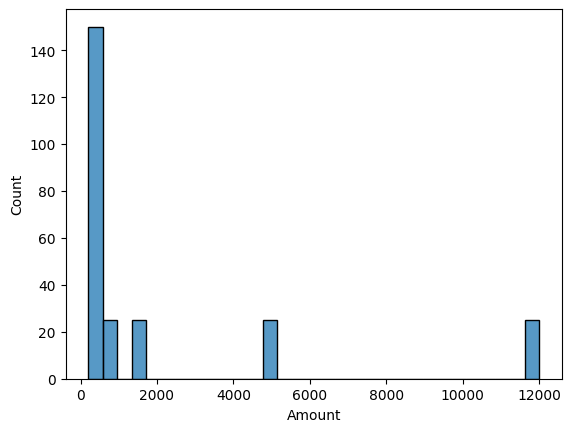

In [196]:
sns.histplot(data=order,x='Amount')

There are total 50 records which is above the upper bound , it contributes to total 20 % and it's not outlires


In [197]:
customer['Age'].describe()

count    250.000000
mean      47.576000
std       18.978011
min       18.000000
25%       29.000000
50%       47.000000
75%       63.000000
max       80.000000
Name: Age, dtype: float64

customer table have age which falls between 18 to 80 hence customer table don't have any outliers

Rename the column names of each dataframe

In [223]:

## rename the column names in all the tables , making it as lowercase 

customer.rename(columns={'Customer_ID':'customer_id','First':'first_name','Last':'last_name','Age':'age','Country':'country'}, inplace=True)
order.rename(columns={'Order_ID':'order_id','Item':'item','Amount':'sale_amount','Customer_ID':'customer_id'}, inplace=True)
shipping.rename(columns={'Shipping_ID':'shipping_id','Status':'status','Customer_ID':'customer_id'},inplace=True)


## addition of new column full name using first_name and last_name in customer table
customer['first_name'].str.strip()
customer['last_name'].str.strip()
customer['full_name']=customer['first_name']+' '+customer['last_name']
## addign age group
customer['age_group']=customer['age'].apply(lambda age: '>30' if(age >= 30) else '<30')



Joining the datafarmes to check any discrepancy while merging the data

In [200]:
cust_ord=pd.merge(order,customer, on='customer_id',how='right')

In [201]:
cust_ord

,order_id,item,sale_amount,customer_id,first_name,last_name,age,country
0,NaN,NaN,NaN,1,Joseph,Rice,43,USA
1,NaN,NaN,NaN,2,Gary,Moore,71,USA
2,NaN,NaN,NaN,3,John,Walker,44,UK
3,118.0,Mousepad,200.0,4,Eric,Carter,38,UK
4,19.0,DDR RAM,1500.0,5,William,Jackson,58,UAE
...,...,...,...,...,...,...,...,...
335,40.0,Headset,900.0,249,Patricia,Garcia,19,UK
336,79.0,DDR RAM,1500.0,249,Patricia,Garcia,19,UK
337,125.0,Mousepad,250.0,249,Patricia,Garcia,19,UK
338,188.0,Mousepad,200.0,249,Patricia,Garcia,19,UK


In [208]:
#### count of customers who are not appearing in order table
cust_ord=pd.merge(order,customer, on='customer_id',how='right')


cust_ord.loc[cust_ord['order_id'].isnull(),['customer_id','full_name','country']]

,customer_id,full_name,country
0,1,Joseph Rice,USA
1,2,Gary Moore,USA
2,3,John Walker,UK
5,6,N!cole Jones,USA
6,7,David Davis,USA
...,...,...,...
319,237,Donna Bird,USA
324,240,Edward Bray,UAE
325,241,Brenda Hines,USA
329,245,Christopher Miles,UAE


In [ ]:
## customers not appearing in shipping table
cust_ship=pd.merge(shipping,customer, on='customer_id',how='right')
cust_ship.loc[cust_ship['shipping_id'].isnull(),['customer_id','full_name','country']]

,customer_id,full_name,country
4,4,Eric Carter,UK
5,5,William Jackson,UAE
7,7,David Davis,USA
23,16,David Benson,USA
26,19,James Johnson,UK
...,...,...,...
331,239,Janet Holmes,UK
337,243,Alejandro Bailey,UK
341,247,John Miller,USA
344,249,Patricia Garcia,UK


In [212]:
##customers not appearing both shipping and orders
cust_ord_ship=pd.merge(shipping,cust_ord,on='customer_id',how='right')
cust_ord_ship.loc[cust_ord_ship['order_id'].isnull()& cust_ord_ship['shipping_id'].isnull(),['customer_id','age','country','full_name']].drop_duplicates()

,customer_id,age,country,full_name
7,7,59,USA,David Davis
31,16,61,USA,David Benson
34,19,67,UK,James Johnson
48,25,36,UAE,Raymond Taylor
59,31,42,USA,Craig Myers
...,...,...,...,...
394,213,68,UK,Gloria Miller
401,217,28,USA,Shelby Gomez
419,227,37,USA,Aaron Mckee
428,233,28,UK,Samantha Smith


In [220]:
## orders who don't have shipment details 

order.loc[~order['customer_id'].isin(shipping['customer_id']), ['order_id']].shape[0]

94

conclusion:
<ul>
<li>there are total 35 customers who neither placed an order or thier orders are shipped</li>
<li>There are total 90 customers who didn't place an order</li>
<li>there are total 98 customers who are not in shipping Table</li>
<li>there are total 94 orders whose shipment details are missing</li>
</ul>
details are given in the document provided